In [1]:
import pandas as pd
df_Log = pd.read_csv('Log_Data02.csv')
df_Log['총금액'] = df_Log['판매금액'] + df_Log['추가결제금액']
df_Log['매출'] = df_Log['총금액'] * df_Log['수수료율']

In [2]:
df_Log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344299 entries, 0 to 344298
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      344299 non-null  int64  
 1   수수료율      344299 non-null  float64
 2   고객ID      344299 non-null  int64  
 3   프로그램수정횟수  344299 non-null  float64
 4   추가결제금액    344299 non-null  int64  
 5   거래취소여부    4597 non-null    float64
 6   거래취소일자    4597 non-null    float64
 7   서비스명      344277 non-null  object 
 8   판매자       344277 non-null  object 
 9   판매금액      344278 non-null  float64
 10  서비스가격     344277 non-null  float64
 11  평점        344277 non-null  float64
 12  이용자수      344277 non-null  float64
 13  대분류       344277 non-null  object 
 14  서비스번호     344277 non-null  float64
 15  총금액       344278 non-null  float64
 16  매출        344278 non-null  float64
dtypes: float64(11), int64(3), object(3)
memory usage: 44.7+ MB


In [3]:
df_Log.nunique()

거래일자           176
수수료율             3
고객ID        137526
프로그램수정횟수        45
추가결제금액        2011
거래취소여부           1
거래취소일자         177
서비스명          2787
판매자           2066
판매금액          7556
서비스가격          187
평점              21
이용자수           166
대분류             12
서비스번호         2863
총금액           6289
매출            9722
dtype: int64

In [7]:
df_Log.columns

Index(['거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '거래취소일자',
       '서비스명', '판매자', '판매금액', '서비스가격', '평점', '이용자수', '대분류', '서비스번호', '총금액',
       '매출'],
      dtype='object')

In [10]:
df_Log_numeric = df_Log[['프로그램수정횟수', '추가결제금액',
                         '판매금액', '서비스가격', '평점',
                         '이용자수', '총금액','매출']]

In [14]:
# 지수 표기 없애고, 소수점 2자리까지 표시
pd.set_option('display.float_format', '{:.2f}'.format)

# 요약 통계 재출력
df_Log_numeric.describe()

,프로그램수정횟수,추가결제금액,판매금액,서비스가격,평점,이용자수,총금액,매출
count,344299.00,344299.00,344278.00,344277.00,344277.00,344277.00,344278.00,344278.00
mean,0.17,3998.39,62992.30,60389.45,4.83,54.80,66990.61,465480.14
std,0.72,9074.91,256830.75,257547.78,0.81,90.53,257375.31,1799037.15
min,-1.00,0.00,0.00,5000.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,10000.00,9000.00,5.00,8.00,11000.00,79200.00
50%,0.00,0.00,23950.00,20000.00,5.00,22.00,30000.00,195000.00
75%,0.00,6500.00,50000.00,50000.00,5.00,62.00,53800.00,375700.00
max,119.00,1445200.00,44000000.00,44000000.00,5.00,584.00,44000000.00,286000000.00


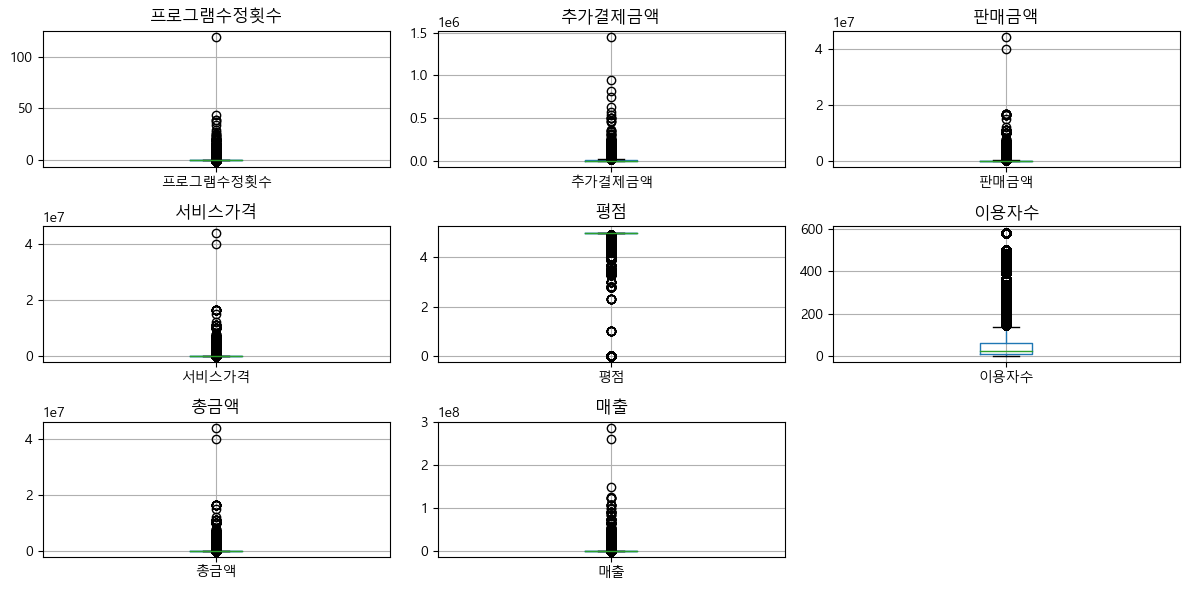

In [26]:
# 박스플롯 그려서 이상치 확인 ----------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.figure(figsize=(12, 6))
for i, col in enumerate(df_Log_numeric.columns, 1):
    plt.subplot(3, 3, i)  # 3행 3열 서브플롯
    df_Log_numeric.boxplot(column=[col])
    plt.title(col)

plt.tight_layout()  # 자동 레이아웃 조정
plt.show()

C:\Users\woota\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\woota\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\woota\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\woota\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\woota\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1269: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\woota\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1277: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\woota\a

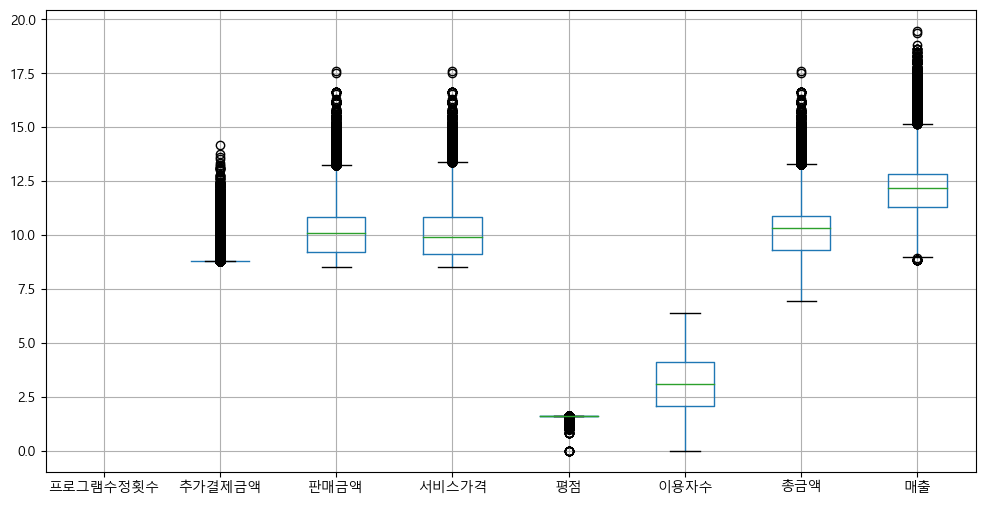

In [27]:
# 로그변환 후 확인 --------------------------------------------------------------
import numpy as np
df_log = df_Log_numeric.apply(lambda x: np.log(x))
df_log.boxplot(figsize=(12, 6))
plt.show()

In [15]:
df_Log_category = df_Log[['수수료율', '거래취소여부', '대분류']]

In [18]:
df_Log_category['거래취소여부'] = df_Log_category['거래취소여부'].fillna(0)

C:\Users\woota\AppData\Local\Temp\ipykernel_16100\2735437218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Log_category['거래취소여부'] = df_Log_category['거래취소여부'].fillna(0)


In [21]:
df_Log_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344299 entries, 0 to 344298
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   수수료율    344299 non-null  category
 1   거래취소여부  344299 non-null  category
 2   대분류     344277 non-null  category
dtypes: category(3)
memory usage: 1009.5 KB


In [20]:
df_Log_category['수수료율'] = df_Log_category['수수료율'].astype('category')
df_Log_category['거래취소여부'] = df_Log_category['거래취소여부'].astype('category')
df_Log_category['대분류'] = df_Log_category['대분류'].astype('category')

C:\Users\woota\AppData\Local\Temp\ipykernel_16100\3761253659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Log_category['수수료율'] = df_Log_category['수수료율'].astype('category')
C:\Users\woota\AppData\Local\Temp\ipykernel_16100\3761253659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Log_category['거래취소여부'] = df_Log_category['거래취소여부'].astype('category')
C:\Users\woota\AppData\Local\Temp\ipykernel_16100\3761253659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [22]:
df_Log_category.describe()

,수수료율,거래취소여부,대분류
count,344299.00,344299.00,344277
unique,3.00,2.00,12
top,6.50,0.00,홈페이지
freq,241009.00,339702.00,124007
